In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# **Importing Libraries and Dependencies**

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

# **Reading the Data**

In [3]:
tit_train = pd.read_csv('../input/titanic/train.csv')
tit_test = pd.read_csv('../input/titanic/test.csv')

In [4]:
tit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
tit_train.head(), tit_train.shape

(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450   8.0500

In [6]:
tit_train.isnull().sum(), tit_train.columns


(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [7]:
tit_test.isnull().sum(), tit_test.columns

(PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64,
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [8]:
# titanic_missing_vals = (tit_train.isnull().sum())
# print(titanic_missing_vals[titanic_missing_vals > 0])

In [9]:
# tit_train2 = tit_train.fillna(float(f"NaN")) # Could use a Range Value
# tit_train2

In [10]:
# tit_train3 = tit_train.dropna(subset = ["Cabin", "Age", "Embarked"], inplace=False)
# tit_train3

In [11]:
# tit_train3.shape

In [12]:
tit_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
women = tit_train.loc[tit_train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [14]:
men = tit_train.loc[tit_train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


# **Graph Plotting**

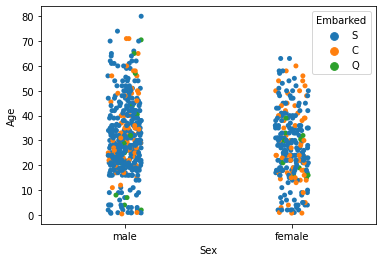

In [15]:
ax = sns.stripplot(x='Sex', y='Age', hue = 'Embarked' ,data = tit_train)
# ax = sns.displot(x='Age', y='Embarked',data = tit_train)

# **Training the model**

In [16]:
tit_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
y = tit_train.Survived

titanic_feat = ["Pclass", "Sex", "SibSp", "Parch"]


X = pd.get_dummies(tit_train[titanic_feat])
X_test = pd.get_dummies(tit_test[titanic_feat])

In [18]:
X.head()

,Pclass,SibSp,Parch,Sex_female,Sex_male
0,3,1,0,0,1
1,1,1,0,1,0
2,3,0,0,1,0
3,1,1,0,1,0
4,3,0,0,0,1


# **Using RandomForestClassifier**

In [19]:
# y = tit_train["Survived"]

# features = ["Pclass", "Sex", "SibSp", "Parch"]
# X = pd.get_dummies(tit_train[features])
# X_test = pd.get_dummies(tit_test[features])

# model = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=1)
# model.fit(X, y)
# preds_rfc = model.predict(X_test)

# **Using DecisionTreeClassifier**

In [20]:
y = tit_train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(tit_train[features])
X_test = pd.get_dummies(tit_test[features])

model = DecisionTreeClassifier(random_state=1)
model.fit(X, y)
preds_dtc = model.predict(X_test)

In [21]:
# output1 = pd.DataFrame({'PassengerId': tit_test.PassengerId, 'Survived': preds_rfc})
# output1.to_csv('submission_rfc.csv', index=False)
# print("Your submission was successfully saved!")

output2 = pd.DataFrame({'PassengerId': tit_test.PassengerId, 'Survived': preds_dtc})
output2.to_csv('submission_dtc.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
